 # Study case | FIFA

In [5]:
from IPython.display import Image
from IPython.core.display import HTML

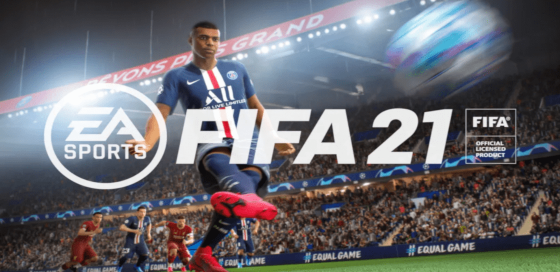

# 01 - Problem (case study)

### Data Description

Data provided in a csv table with the following features:

* Number of rows: 13700
* Number of columns: 102 <br>
<br>
* Number of numerical variables: 54
* Numbre of categorical/non-numerical variables: 48

## 01 - Goal

The objective of this data is to understand the scoring of FIFA players. We will use linear regression to build a model that can predict their overall score based on multiple variables.

## 02 - Getting Data and Preparing Notebook

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# Open file and show shape
data = pd.read_csv('https://raw.githubusercontent.com/mbescansa/FIFA_Model/main/fifa21_trainning.csv')
data.head(2)

data.shape

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77


(13700, 102)

### Numerical Data

In [9]:
data_num= data.select_dtypes(['float64','int64'])
data_num.head(2)

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,1954,184383,26,1,258,54,47,43,70,44.0,...,6,1682,357,69,51,63,63,51,60,64
1,2225,188044,30,0,365,66,79,76,68,76.0,...,16,1961,412,83,75,68,82,33,71,77


### Categorical Data

In [10]:
data_obj= data.select_dtypes('object')
data_obj.head()

,Name,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Joined,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,"Jul 1, 2015",...,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,"Jan 16, 2015",...,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,"Jan 31, 2019",...,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,"Jul 1, 2016",...,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,"Jul 1, 2018",...,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2


## 03 - Cleaning/Wrangling/EDA

In [11]:
#to convert all headers (lower case)
data.columns= data.columns.str.lower()

In [12]:
data.columns

Index(['unnamed: 0', 'id', 'name', 'age', 'nationality', 'club', 'bp',
       'position', 'team & contract', 'height',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova'],
      dtype='object', length=102)

In [13]:
#to check NAN values for later dropping them
data.isna().sum()

unnamed: 0     0
id             0
name           0
age            0
nationality    0
              ..
cb             0
rcb            0
rb             0
gk             0
ova            0
Length: 102, dtype: int64

In [14]:
#drop some irrelevant columns
data= data.drop(['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','position','team & contract','joined','loan date end', 'release clause', 'contract','unnamed: 0', 'attacking','skill','movement','power','mentality','defending','goalkeeping','value','wage','foot'],axis=1)

In [15]:
data.head(2)


,id,name,age,nationality,club,bp,height,weight,growth,crossing,...,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,"5'9""",161lbs,1,54,...,Medium,1 ★,69,51,63,63,51,60,3,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,"6'0""",159lbs,0,66,...,Low,2 ★,83,75,68,82,33,71,44,77


In [16]:
#put id columns as index
data= data.set_index('id')
data.head()
data.columns


,name,age,nationality,club,bp,height,weight,growth,crossing,finishing,...,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova
id,,,,,,,,,,,,,,,,,,,,,
184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,"5'9""",161lbs,1,54,47,...,Medium,1 ★,69,51,63,63,51,60,3,64
188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,"6'0""",159lbs,0,66,79,...,Low,2 ★,83,75,68,82,33,71,44,77
184431,S. Giovinco,33,Italy,Al Hilal,CAM,"5'4""",134lbs,0,73,76,...,Medium,2 ★,80,77,78,86,27,56,73,80
233796,J. Evans,22,Wales,Swansea City,CDM,"5'10""",152lbs,13,44,42,...,Medium,1 ★,57,44,54,57,57,60,7,59
234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,"5'11""",150lbs,8,49,37,...,Medium,1 ★,66,44,60,64,60,66,4,65


Index(['name', 'age', 'nationality', 'club', 'bp', 'height', 'weight',
       'growth', 'crossing', 'finishing', 'heading accuracy', 'short passing',
       'volleys', 'dribbling', 'curve', 'fk accuracy', 'long passing',
       'ball control', 'acceleration', 'sprint speed', 'agility', 'reactions',
       'balance', 'shot power', 'jumping', 'stamina', 'strength', 'long shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing tackle', 'sliding tackle',
       'gk diving', 'gk handling', 'gk kicking', 'gk positioning',
       'gk reflexes', 'total stats', 'base stats', 'w/f', 'sm', 'a/w', 'd/w',
       'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ova'],
      dtype='object')

In [17]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13700 entries, 184383 to 254882
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              13700 non-null  object 
 1   age               13700 non-null  int64  
 2   nationality       13700 non-null  object 
 3   club              13679 non-null  object 
 4   bp                13700 non-null  object 
 5   height            13700 non-null  object 
 6   weight            13700 non-null  object 
 7   growth            13700 non-null  int64  
 8   crossing          13700 non-null  int64  
 9   finishing         13700 non-null  int64  
 10  heading accuracy  13700 non-null  int64  
 11  short passing     13700 non-null  int64  
 12  volleys           13656 non-null  float64
 13  dribbling         13700 non-null  int64  
 14  curve             13656 non-null  float64
 15  fk accuracy       13700 non-null  int64  
 16  long passing      13700 non-null  

In [18]:
#conversion of data types and standarize columns

data['weight']= data['weight'].str.replace('lbs','')

data['w/f'].head()
data['w/f']=data['w/f'].str.replace('★',' ')

data['sm'].head()
data['sm']=data['sm'].str.replace('★',' ')

data['ir'].head()
data['ir']=data['ir'].str.replace('★',' ')

data['w/f']=pd.to_numeric(data['w/f'],errors='coerce')

data['sm']=pd.to_numeric(data['sm'],errors='coerce')

data['ir']=pd.to_numeric(data['ir'],errors='coerce')


id
184383    4 ★
188044    3 ★
184431    4 ★
233796    2 ★
234799    2 ★
Name: w/f, dtype: object

id
184383    2★
188044    4★
184431    4★
233796    2★
234799    3★
Name: sm, dtype: object

id
184383    1 ★
188044    2 ★
184431    2 ★
233796    1 ★
234799    1 ★
Name: ir, dtype: object

## 04 - Processing Data

,Unnamed: 0,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
Unnamed: 0,1.000000,0.831183,-0.790843,0.734086,-0.238629,-0.208311,-0.153996,-0.189678,-0.234986,-0.242281,...,-0.096217,-0.348730,-0.483972,0.091575,-0.344211,-0.452371,-0.326573,-0.229708,-0.419012,-0.556703
ID,0.831183,1.000000,-0.745955,0.558015,-0.181484,-0.154190,-0.112917,-0.152759,-0.177445,-0.207549,...,-0.089393,-0.238416,-0.334938,0.184321,-0.283240,-0.367248,-0.228548,-0.166261,-0.293212,-0.432247
Age,-0.790843,-0.745955,1.000000,-0.853173,0.187466,0.154740,0.105448,0.176961,0.182292,0.189094,...,0.117866,0.283718,0.415849,-0.178213,0.307924,0.400467,0.238996,0.226863,0.435799,0.519422
Growth,0.734086,0.558015,-0.853173,1.000000,-0.279956,-0.249958,-0.186655,-0.227710,-0.269864,-0.253624,...,-0.046508,-0.394335,-0.514482,0.021311,-0.331973,-0.438532,-0.317339,-0.241951,-0.484459,-0.596555
Attacking,-0.238629,-0.181484,0.187466,-0.279956,1.000000,0.844010,0.877999,0.704616,0.881521,0.898598,...,-0.763347,0.903097,0.421245,0.177481,0.345348,0.366526,0.373814,0.107154,0.102614,0.426562
Crossing,-0.208311,-0.154190,0.154740,-0.249958,0.844010,1.000000,0.649771,0.437397,0.800626,0.678776,...,-0.651135,0.852190,0.479893,0.300631,0.204212,0.499520,0.440493,0.224720,-0.004757,0.383847
Finishing,-0.153996,-0.112917,0.105448,-0.186655,0.877999,0.649771,1.000000,0.452578,0.652601,0.890854,...,-0.576469,0.706703,0.353116,0.277447,0.604583,0.321672,0.465664,-0.262723,-0.069403,0.299406
Heading Accuracy,-0.189678,-0.152759,0.176961,-0.227710,0.704616,0.437397,0.452578,1.000000,0.631712,0.489381,...,-0.714166,0.608822,0.103422,-0.172903,-0.123399,-0.098020,-0.154054,0.382123,0.399275,0.300648
Short Passing,-0.234986,-0.177445,0.182292,-0.269864,0.881521,0.800626,0.652601,0.631712,1.000000,0.686659,...,-0.720640,0.899119,0.468903,0.092586,0.150053,0.461659,0.342595,0.363587,0.164118,0.488475
Volleys,-0.242281,-0.207549,0.189094,-0.253624,0.898598,0.678776,0.890854,0.489381,0.686659,1.000000,...,-0.573128,0.754938,0.384537,0.210841,0.546637,0.373353,0.453023,-0.153337,-0.012050,0.358715


<AxesSubplot:>

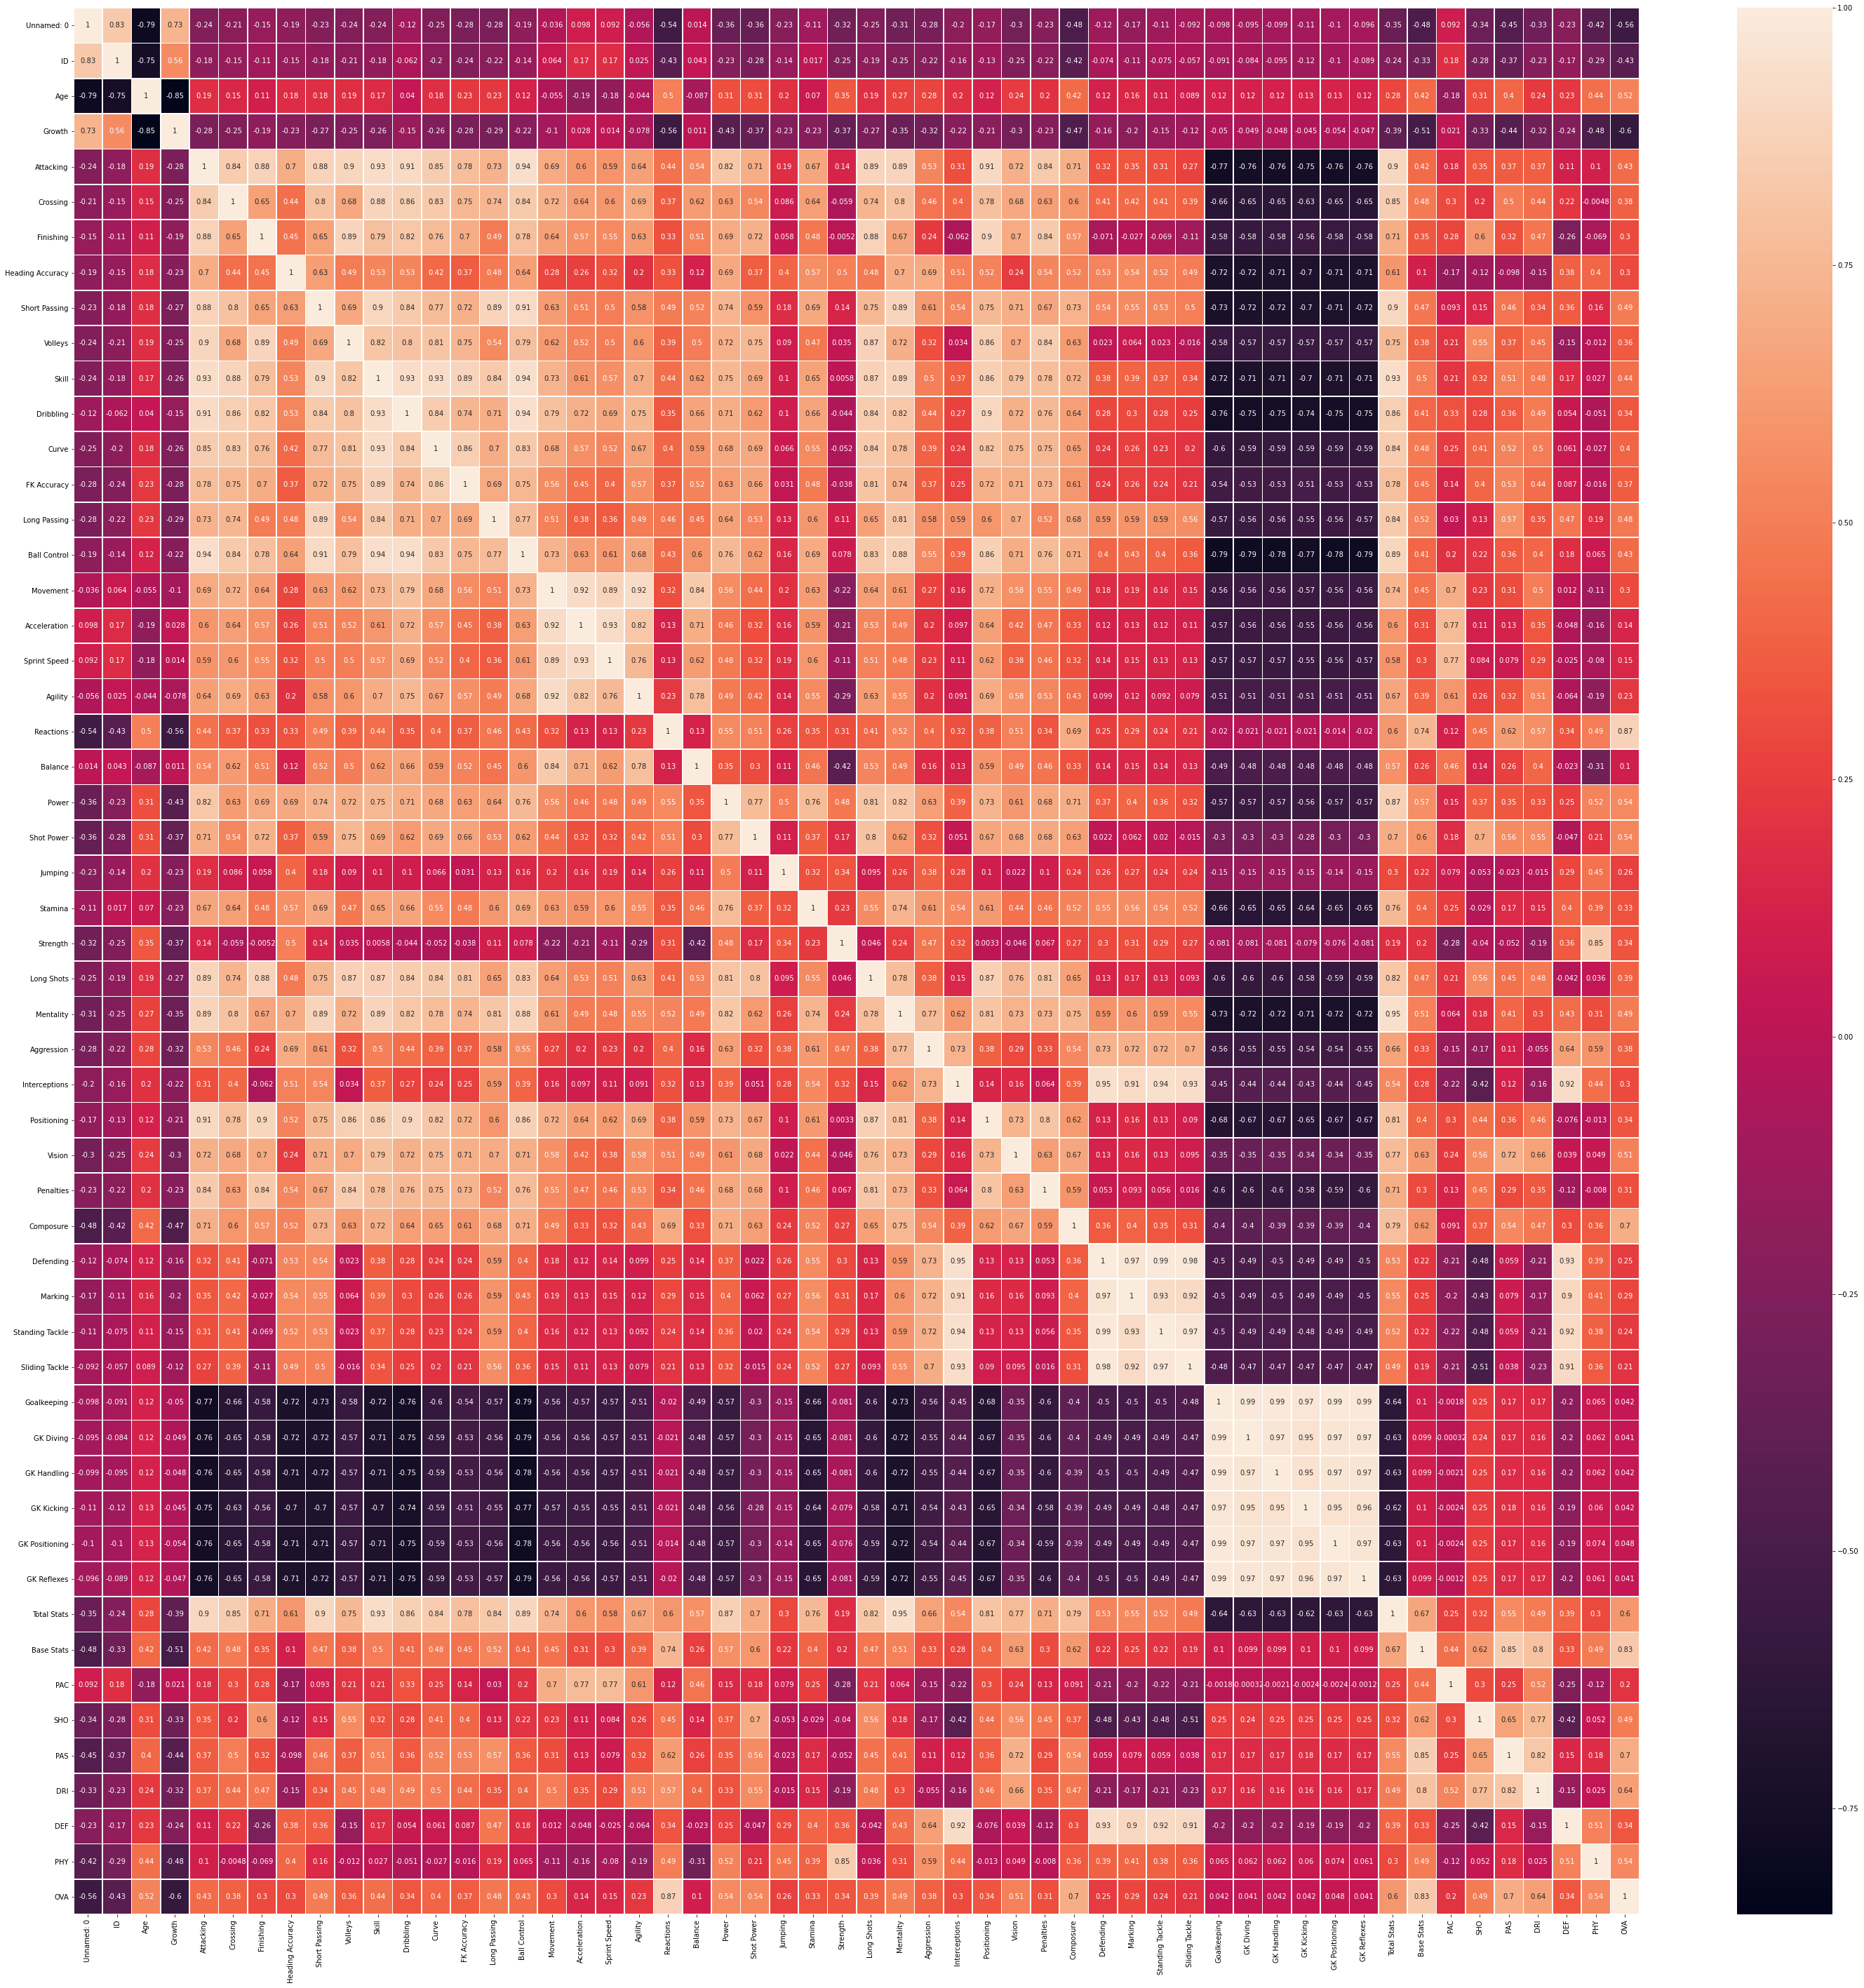

In [19]:
corr_matrix = data_num.corr()
corr_matrix

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

In [20]:
# We remove some columns because they seem to be highlycorrelated with our target OVA
data= data.drop(['base stats','reactions','pas','marking','standing tackle','sliding tackle','gk diving','gk handling','gk kicking','gk positioning','gk reflexes'],axis=1)

#### Normalization

In [21]:
#in this ocassion, we have decided to standardize the data with the MinMaxScaler in order to make numbers to be between -1 and 1  
from sklearn.preprocessing import MinMaxScaler

numerical = data._get_numeric_data()
transformer = MinMaxScaler().fit(numerical)
x_standardized = transformer.transform(numerical)
numerical2=pd.DataFrame(x_standardized, columns=numerical.columns)
numerical2.head()



,age,growth,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,...,total stats,w/f,sm,ir,pac,sho,dri,def,phy,ova
0,0.322581,0.074074,0.545455,0.478261,0.431818,0.720930,0.465116,0.615385,0.444444,0.561798,...,0.604577,0.75,0.25,0.00,0.614286,0.447368,0.522388,0.500000,0.500000,0.472727
1,0.451613,0.037037,0.681818,0.826087,0.806818,0.697674,0.837209,0.857143,0.822222,0.752809,...,0.781945,0.50,0.75,0.25,0.814286,0.763158,0.805970,0.269231,0.666667,0.709091
2,0.548387,0.037037,0.761364,0.793478,0.329545,0.813953,0.825581,0.879121,0.944444,0.966292,...,0.759059,0.75,0.75,0.25,0.771429,0.789474,0.865672,0.192308,0.439394,0.763636
3,0.193548,0.518519,0.431818,0.423913,0.602273,0.627907,0.372093,0.538462,0.411111,0.460674,...,0.506039,0.25,0.25,0.00,0.442857,0.355263,0.432836,0.576923,0.500000,0.381818
4,0.225806,0.333333,0.488636,0.369565,0.636364,0.697674,0.348837,0.648352,0.444444,0.449438,...,0.593134,0.25,0.50,0.00,0.571429,0.355263,0.537313,0.615385,0.590909,0.490909


#### Separate x and y

In [22]:
#separate the features(we are trying to predict the Traget so this one will be the feature) from the labels
y= data['ova'] # this one is the feature we are trying to predict
X= data.drop(['ova'],axis=1) # these are the rest of labelss

In [23]:
X_num= X.select_dtypes(include=np.number)
X_cat= X.select_dtypes(include=np.object)

In [24]:
X_num.head()

,age,growth,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,...,composure,total stats,w/f,sm,ir,pac,sho,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
184383,26,1,54,47,43,70,44.0,61,44.0,55,...,54.0,1682,4,2,1,69,51,63,51,60
188044,30,0,66,79,76,68,76.0,83,78.0,72,...,70.0,1961,3,4,2,83,75,82,33,71
184431,33,0,73,76,34,78,75.0,85,89.0,91,...,82.0,1925,4,4,2,80,77,86,27,56
233796,22,13,44,42,58,62,36.0,54,41.0,46,...,48.0,1527,2,2,1,57,44,57,57,60
234799,23,8,49,37,61,68,34.0,64,44.0,45,...,58.0,1664,2,3,1,66,44,64,60,66


In [25]:
X_cat.head()

,name,nationality,club,bp,height,weight,a/w,d/w,hits
id,,,,,,,,,
184383,A. Pasche,Switzerland,FC Lausanne-Sport,CM,"5'9""",161,High,Medium,3
188044,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,"6'0""",159,High,Low,44
184431,S. Giovinco,Italy,Al Hilal,CAM,"5'4""",134,High,Medium,73
233796,J. Evans,Wales,Swansea City,CDM,"5'10""",152,Medium,Medium,7
234799,Y. Demoncy,France,US Orléans Loiret Football,CDM,"5'11""",150,Low,Medium,4


#### One Hot/Label Encoding (categorical).

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
# # Encoding Categorical Data.

from sklearn.preprocessing import LabelEncoder

label_encoded2 = LabelEncoder().fit(X_cat['nationality']).transform(X_cat['nationality']) # ordered wrt value counts
label_encoded2 = pd.DataFrame(label_encoded2, columns=['nationality'])
label_encoded3 = LabelEncoder().fit(X_cat['bp']).transform(X_cat['bp'])
label_encoded3 = pd.DataFrame(label_encoded3, columns=['bp'])

label_encoded5 = LabelEncoder().fit(X_cat['hits']).transform(X_cat['hits'])
label_encoded5 = pd.DataFrame(label_encoded5, columns=['hits'])
label_encoded6 = LabelEncoder().fit(X_cat['height']).transform(X_cat['height'])
label_encoded6 = pd.DataFrame(label_encoded5, columns=['height'])


X_cat= X_cat.dropna()



In [28]:
correlation_matrix= data.corr()
correlation_matrix

,age,growth,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,...,total stats,w/f,sm,ir,pac,sho,dri,def,phy,ova
age,1.000000,-0.853173,0.154740,0.105448,0.176961,0.182292,0.189094,0.040179,0.183681,0.229586,...,0.283718,0.083049,0.071850,0.403081,-0.178213,0.307924,0.238996,0.226863,0.435799,0.519422
growth,-0.853173,1.000000,-0.249958,-0.186655,-0.227710,-0.269864,-0.253624,-0.150997,-0.255724,-0.276307,...,-0.394335,-0.101612,-0.168254,-0.270225,0.021311,-0.331973,-0.317339,-0.241951,-0.484459,-0.596555
crossing,0.154740,-0.249958,1.000000,0.649771,0.437397,0.800626,0.678776,0.855821,0.834639,0.752156,...,0.852190,0.284216,0.708069,0.180431,0.300631,0.204212,0.440493,0.224720,-0.004757,0.383847
finishing,0.105448,-0.186655,0.649771,1.000000,0.452578,0.652601,0.890854,0.821540,0.763103,0.696060,...,0.706703,0.365075,0.724283,0.156317,0.277447,0.604583,0.465664,-0.262723,-0.069403,0.299406
heading accuracy,0.176961,-0.227710,0.437397,0.452578,1.000000,0.631712,0.489381,0.532469,0.415247,0.366654,...,0.608822,0.166387,0.368205,0.173572,-0.172903,-0.123399,-0.154054,0.382123,0.399275,0.300648
short passing,0.182292,-0.269864,0.800626,0.652601,0.631712,1.000000,0.686659,0.840452,0.768457,0.722441,...,0.899119,0.309391,0.680064,0.239173,0.092586,0.150053,0.342595,0.363587,0.164118,0.488475
volleys,0.189094,-0.253624,0.678776,0.890854,0.489381,0.686659,1.000000,0.802739,0.806043,0.745628,...,0.754938,0.368793,0.731655,0.242614,0.210841,0.546637,0.453023,-0.153337,-0.012050,0.358715
dribbling,0.040179,-0.150997,0.855821,0.821540,0.532469,0.840452,0.802739,1.000000,0.844579,0.744241,...,0.859057,0.341558,0.799782,0.145392,0.328022,0.279247,0.487531,0.053854,-0.050615,0.344376
curve,0.183681,-0.255724,0.834639,0.763103,0.415247,0.768457,0.806043,0.844579,1.000000,0.855709,...,0.844260,0.333697,0.757604,0.225652,0.246892,0.405193,0.500415,0.060839,-0.026874,0.397193
fk accuracy,0.229586,-0.276307,0.752156,0.696060,0.366654,0.722441,0.745628,0.744241,0.855709,1.000000,...,0.784808,0.326519,0.675427,0.228848,0.137286,0.399650,0.435344,0.086938,-0.016366,0.366955


#### Drop NaN values

In [29]:
data= data.dropna()
data.shape

(13358, 46)

In [30]:
#separate the features(we are trying to predict the Traget so this one will be the feature) from the labels
y= data['ova'] # this one is the feature we are trying to predict
X= data.drop(['ova'],axis=1) # this are the rest of labelss

In [31]:
X_num= X.select_dtypes(include=np.number)
X_cat= X.select_dtypes(include=np.object)

In [32]:
X_num.head()

,age,growth,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,...,composure,total stats,w/f,sm,ir,pac,sho,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
184383,26,1,54,47,43,70,44.0,61,44.0,55,...,54.0,1682,4,2,1,69,51,63,51,60
188044,30,0,66,79,76,68,76.0,83,78.0,72,...,70.0,1961,3,4,2,83,75,82,33,71
184431,33,0,73,76,34,78,75.0,85,89.0,91,...,82.0,1925,4,4,2,80,77,86,27,56
233796,22,13,44,42,58,62,36.0,54,41.0,46,...,48.0,1527,2,2,1,57,44,57,57,60
234799,23,8,49,37,61,68,34.0,64,44.0,45,...,58.0,1664,2,3,1,66,44,64,60,66


In [33]:
X_num= X_num.dropna()

In [34]:
X_num.isna().sum()

age                 0
growth              0
crossing            0
finishing           0
heading accuracy    0
short passing       0
volleys             0
dribbling           0
curve               0
fk accuracy         0
long passing        0
ball control        0
acceleration        0
sprint speed        0
agility             0
balance             0
shot power          0
jumping             0
stamina             0
strength            0
long shots          0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
total stats         0
w/f                 0
sm                  0
ir                  0
pac                 0
sho                 0
dri                 0
def                 0
phy                 0
dtype: int64

In [35]:
X_num.head()

,age,growth,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,...,composure,total stats,w/f,sm,ir,pac,sho,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
184383,26,1,54,47,43,70,44.0,61,44.0,55,...,54.0,1682,4,2,1,69,51,63,51,60
188044,30,0,66,79,76,68,76.0,83,78.0,72,...,70.0,1961,3,4,2,83,75,82,33,71
184431,33,0,73,76,34,78,75.0,85,89.0,91,...,82.0,1925,4,4,2,80,77,86,27,56
233796,22,13,44,42,58,62,36.0,54,41.0,46,...,48.0,1527,2,2,1,57,44,57,57,60
234799,23,8,49,37,61,68,34.0,64,44.0,45,...,58.0,1664,2,3,1,66,44,64,60,66


In [36]:
X_cat.head()

,name,nationality,club,bp,height,weight,a/w,d/w,hits
id,,,,,,,,,
184383,A. Pasche,Switzerland,FC Lausanne-Sport,CM,"5'9""",161,High,Medium,3
188044,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,"6'0""",159,High,Low,44
184431,S. Giovinco,Italy,Al Hilal,CAM,"5'4""",134,High,Medium,73
233796,J. Evans,Wales,Swansea City,CDM,"5'10""",152,Medium,Medium,7
234799,Y. Demoncy,France,US Orléans Loiret Football,CDM,"5'11""",150,Low,Medium,4


In [37]:
y = data['ova']
y.head()

id
184383    64
188044    77
184431    80
233796    59
234799    65
Name: ova, dtype: int64

#### Train, test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.3, random_state=1000)



In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9350, 36)
(4008, 36)
(9350,)
(4008,)


In [40]:
X_train.head()

,age,growth,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,...,composure,total stats,w/f,sm,ir,pac,sho,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
244321,24,4,44,62,59,56,63.0,60,54.0,32,...,57.0,1674,4,3,1,79,63,61,41,74
198705,27,1,74,66,59,72,58.0,73,68.0,63,...,73.0,1968,4,3,2,73,65,73,70,61
238186,20,13,12,8,10,28,5.0,7,13.0,14,...,42.0,961,2,1,1,65,61,69,26,60
257364,17,18,30,31,47,53,28.0,48,31.0,39,...,38.0,1353,3,2,1,58,35,50,49,57
206145,26,4,11,8,12,36,9.0,10,7.0,11,...,23.0,1031,2,1,1,69,69,71,38,69


In [41]:
X_test.head()

,age,growth,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,...,composure,total stats,w/f,sm,ir,pac,sho,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
254503,16,23,49,58,43,50,43.0,69,45.0,47,...,39.0,1374,3,2,1,69,50,65,28,42
255451,28,0,62,33,44,64,24.0,48,28.0,33,...,43.0,1444,2,2,1,65,31,55,59,56
254580,17,13,10,5,12,17,6.0,12,10.0,10,...,37.0,911,3,1,1,59,54,60,35,54
257885,29,0,51,51,62,66,46.0,58,48.0,52,...,65.0,1764,3,2,1,64,56,60,64,70
215969,27,1,70,48,59,75,38.0,65,41.0,42,...,58.0,1742,3,3,1,57,48,66,68,61


## 05 - Modeling

In [42]:
#we train/fit our model
model = linear_model.LinearRegression()
model = model.fit(X_train,y_train)

In [43]:
predicted= model.predict(X_test)

## 06 - Validation

In [44]:
from sklearn.metrics import r2_score

r2_score(y_test,predicted)

0.8734996573973208

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
mse = mean_squared_error(y_test, predictions)
print(mse)

5.681225109655268


In [48]:
rmse = math.sqrt(mse)
print(rmse)

2.3835320660010573


In [57]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Using scikit-lean, the error is {}'.format(mae))

Using scikit-lean, the error is 1.8838056526802605


## 07 - Pickling the model

In [53]:
import pickle
pickle.dump(model, open('model.p', 'wb'))
FIFA_LR_model = pickle.load(open('model.p','rb'))

In [55]:
FIFA_LR_model = pickle.load(open('model.p','rb'))
FIFA_LR_model.score(X_test,y_test)

LinearRegression()

In [56]:
FIFA_LR_model.score(X_test,y_test)

0.8734996573973208